# PART 2
##  01Data Visualisations Exercise
### 1.1 Creating Bar Charts
### 1.2 Exporting Charts
### 1.3 Creating Histograms and Scatterplots
### 1.4 Line chart: Sampling Data

## 02 Task 4.9
### Q3: Create a histogram of the “order_hour_of_day” column.
### Q4.  Create a bar chart from the “loyalty_flag” column.
### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
### Q6. conduct some exploratory analysis of customer demographics
### Q7: explore whether there’s a connection between age and spending power (income).

Q8. Export your visualizations as “.png” files in your relevant project folder.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Turned folder path into string 
path= r'/Users/pamnouboussi/27.05.23 Instacart Basket Analysis'

In [3]:
#Import orders_products_merged.pkl file as
cust_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

# 01 Data Visualisations Exercise

## 1.1 Creating Bar Charts

<AxesSubplot:>

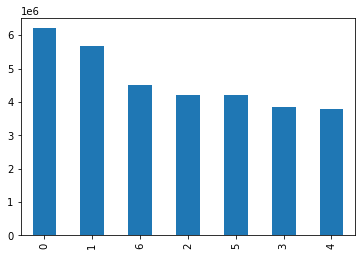

In [5]:
#create order of week bar chart
cust_merged['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

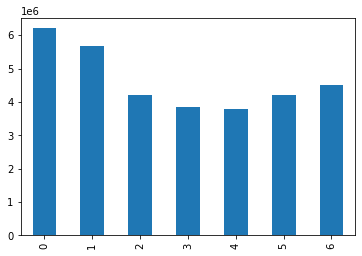

In [9]:
#create bar chart with bars sorted according to indx numbers (can also be used when printing frequencies)
cust_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

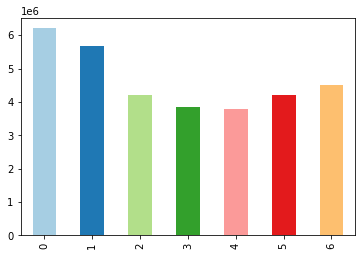

In [10]:
#adding colour argument to bar chart
cust_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color=sns.color_palette('Paired', 11))

## 1.2 Exporting Charts

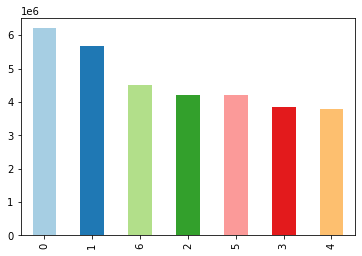

In [12]:
# Save bar chart to jupiters memory
bar=cust_merged['orders_day_of_week'].value_counts().plot.bar(color =sns.color_palette('Paired', 11))

In [13]:
#Export in the form of an img
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 1.3 Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

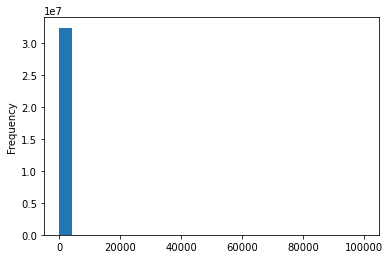

In [11]:
#Histogram of prices collumn
cust_merged['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

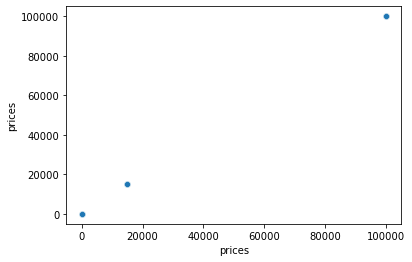

In [12]:
#Scaterplot of pices
sns.scatterplot(x = 'prices', y = 'prices',data = cust_merged)

In [14]:
#Check for outlier values. looking for prices more than 100
cust_merged.loc[cust_merged['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,mix
7805,24261,1435153,1519,26,2,11,6.0,21553,15,0,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Craig
7806,24267,1066435,1519,32,3,10,5.0,21553,28,1,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Craig
15143,39073,1697208,2409,33,1,19,5.0,21553,1,0,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,Nicole
20264,57126,965345,3531,27,2,19,8.0,33664,2,0,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,Alice
20497,61481,2943740,3793,1,2,9,NaN,21553,3,0,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,Jerry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,854612,3265389,51346,4,1,17,13.0,33664,2,1,...,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,nan
32307882,2186800,1179092,131671,12,4,9,15.0,33664,1,0,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,Diana
32310810,658416,1226705,39667,7,2,15,20.0,33664,14,0,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,Johnny
32330048,1583942,3000037,95105,2,4,19,22.0,33664,4,0,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,Catherine


In [15]:
# mark outlier values as missing
cust_merged.loc[cust_merged['prices'] >100, 'prices'] = np.nan

In [16]:
# error check. checking the new maximum value of prices
cust_merged['prices'].max()

25.0

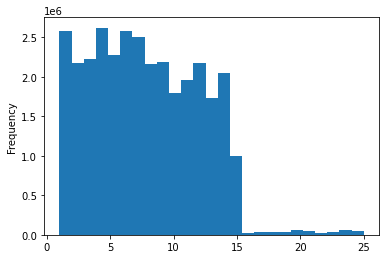

In [44]:
#Histogram of prices collumn
prices_hist=cust_merged['prices'].plot.hist(bins = 25)

## 1.4 Line chart: Sampling Data

In [16]:
#Select 70% of the df.spliting the df into two lists with 70/30 ratio for sampling
# the seed(to get the same set of random numbers intead of creating a new pattern)
#dev stores boolean values
#random creates random numbers, rand ensures the random numbers generated by random follow the uniform distribution
np.random.seed(4)
dev = np.random.rand(len(cust_merged)) <= 0.7

In [17]:
# Split df into two samples according to values in dev list
#true values in big sample, stores 70% of df in big

big = cust_merged[dev]

In [18]:
#Store 30% of sample in small df
small = cust_merged[~dev]

In [21]:
# error check
len(cust_merged)

32404859

In [22]:
len(big) + len (small)

32404859

In [19]:
#reduce sample to include only columns needed in chart
df_2 = small[['orders_day_of_week','prices']]

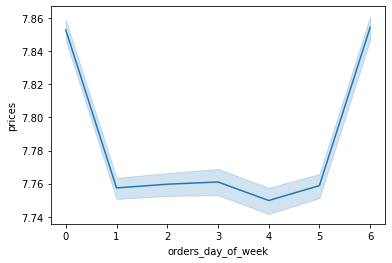

In [24]:
#Create line chart
#sns.lineplot function creates chart and saves it to new object, line
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

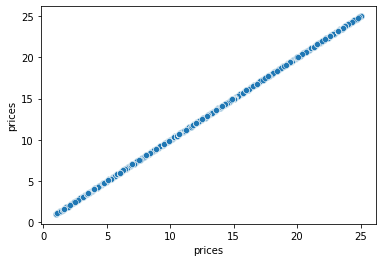

In [26]:
#Scatterplot of the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices',data = cust_merged)

# Task 4.9

### Q3: Create a histogram of the “order_hour_of_day” column.
describe what the histogram demonstrates.

<AxesSubplot:ylabel='Frequency'>

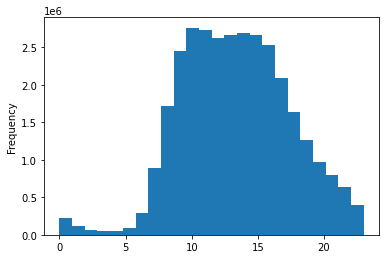

In [29]:
#Histogram of hour of day
cust_merged['order_hour_of_day'].plot.hist(bins = 24)

The Histogram shows that the early hours of the day have the least amount of orders. Orders begin to increase at 6 until they reach thier peak in the morning at 10. they stay high until they begin to decrease at 16. Peak hours are 10-16.

### Q4.  Create a bar chart from the “loyalty_flag” column.

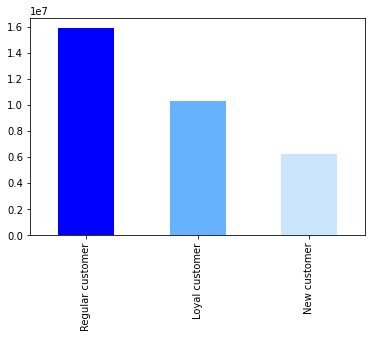

In [45]:
#create loyalty bar chart
loyalty_flag_bar=cust_merged['loyalty_flag'].value_counts().plot.bar(color= ['#0000FF','#66B2FF','#CCE5FF'])

In [ ]:
#determining customers loyalty and department id 


### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [20]:
#Line Chart to determine difference in expenditure between hour of day and prices using small sample
prices_line_chart = small[['order_hour_of_day', 'prices']]

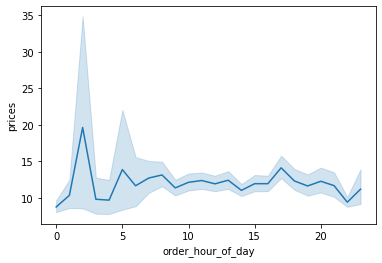

In [21]:
prices_line_chart2 = sns.lineplot(data = prices_line_chart, x = 'order_hour_of_day',y = 'prices')

In [22]:
#Export in the form of an img
prices_line_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_line_chart2.png'))

### Q6. conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. 

In [41]:
#Line Chart to determine conection between age and family and prices using small sample
age_line_chart = small[['age', 'n_dependants']]

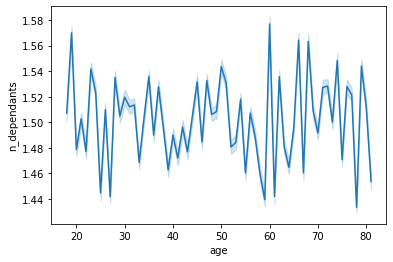

In [42]:
age_line_chart2 = sns.lineplot(data = age_line_chart, x = 'age',y = 'n_dependants')

The plot shows that there is no connection between age and dependants. There are numerous reasons families may have dependans such as children taking care of elderly parents, adult children lving at home, or multigenreational households. 

### Q7: explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

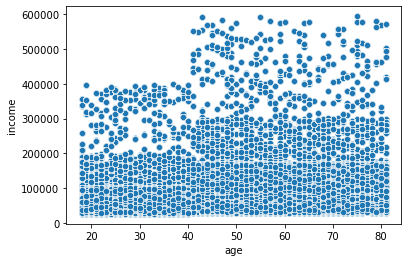

In [43]:
#Scatterplot of the prices column
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income',data = cust_merged)

there seems to be an even spread in the distribution of expenditure amongst income lower than 20000. however as income increases, spending power does increase among the older population, 40 and above. This would need to be investigated further to determine why. 

### Q8. Export your visualizations as “.png” files in your relevant project folder.

In [46]:
#Export prices histogram
prices_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hist.png'))

In [47]:
# export prices line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

In [48]:
#Export prices scattergraph
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [49]:
#Export loyalty flag line chart
loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

In [50]:
#Export prices line chart
prices_line_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_line_chart.png'))

In [51]:
#Export age line chart
age_line_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_line_chart2.png'))

In [52]:
#Export age scatterplot
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatterplot.png'))

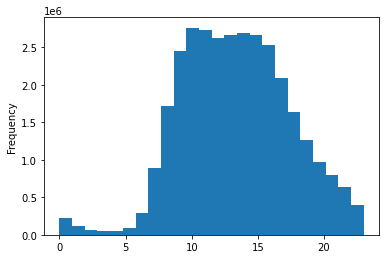

In [53]:
#save histogram to memory
hour_of_day_hist= cust_merged['order_hour_of_day'].plot.hist(bins = 24)

In [54]:
#Save hour of day histogram
hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_hist.png'))